In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
rbk_base = pd.read_excel('rbk.xlsx', sheet_name='База публикаций') # загружаем лист База публикаций
rbk_download = pd.read_excel('rbk.xlsx', sheet_name='Выгрузка') # загружаем лист Выгрузка

In [3]:
rbk_download.drop(columns=['Unnamed: 2','Unnamed: 3'], axis=1,inplace=True) # дропаем ненужные столбцы

In [4]:
rbk_download.columns = ['url','views']   # переименовываем столбцы
rbk_download = rbk_download.drop([0,1])  # удаляем верхние строки

In [5]:
# список исключений
list_to_drop = ['test.pro','test.v2.pro','feature-rbcnews','/preview/','staging.pro','staging.v2.pro'] 
# убираем из данных просмотры содержащие наш список
rbk_download = rbk_download[~rbk_download.url.str.contains('|'.join(list_to_drop))]

In [6]:
# вытаскиваем id из url
rbk_download['id'] = rbk_download['url'].str.extract('(5c.*)', expand=True)

In [7]:
# переименовываем столбцы
rbk_base.columns = ['id','публикация','url']

In [8]:
# мерджем наши таблицы
result_rbk = pd.merge(rbk_base,rbk_download, how='inner', on='id')

In [9]:
# Смотрим наш топ 20
result_rbk.groupby('публикация')['views'].sum().reset_index().sort_values(by='views', ascending=False).head(20)

,публикация,views
94,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",11483
33,«Алые паруса» сворачиваются: почему владельцы ...,11282
206,Кедры решают все: как вывести косметику на аме...,7078
247,Недооцененный экспорт: что имеет смысл продава...,7067
362,Требования работодателя vs ожидания кандидатов...,6689
175,Как потребителей заставили платить больше: чет...,6492
85,Восемь способов увеличить средний чек,6386
125,Золушки молла: где маленьким сервисам найти пр...,6170
229,Менеджеры РФ получают дополнительное образован...,5888
78,"Видишь, я дарю: как заработать на необычных ко...",5877


In [40]:
rbk_visual = result_rbk.groupby('публикация')['views'].sum().reset_index().sort_values(by='views', ascending=False).head(20)

In [19]:
result_rbk.groupby('публикация')['views'].sum().reset_index().sort_values(by='views', ascending=False)

,публикация,views
94,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",11483
33,«Алые паруса» сворачиваются: почему владельцы ...,11282
206,Кедры решают все: как вывести косметику на аме...,7078
247,Недооцененный экспорт: что имеет смысл продава...,7067
362,Требования работодателя vs ожидания кандидатов...,6689
...,...,...
266,Плюсы и минусы удаленной работы: опрос соискат...,2
217,Кредиты против облигаций: почему застройщикам ...,2
356,Ставка на zero: как девелоперы расплачиваются ...,2
67,В Московском регионе за год ввели 805 тыс. кв....,2


Text(0, 0.5, 'Публикация')

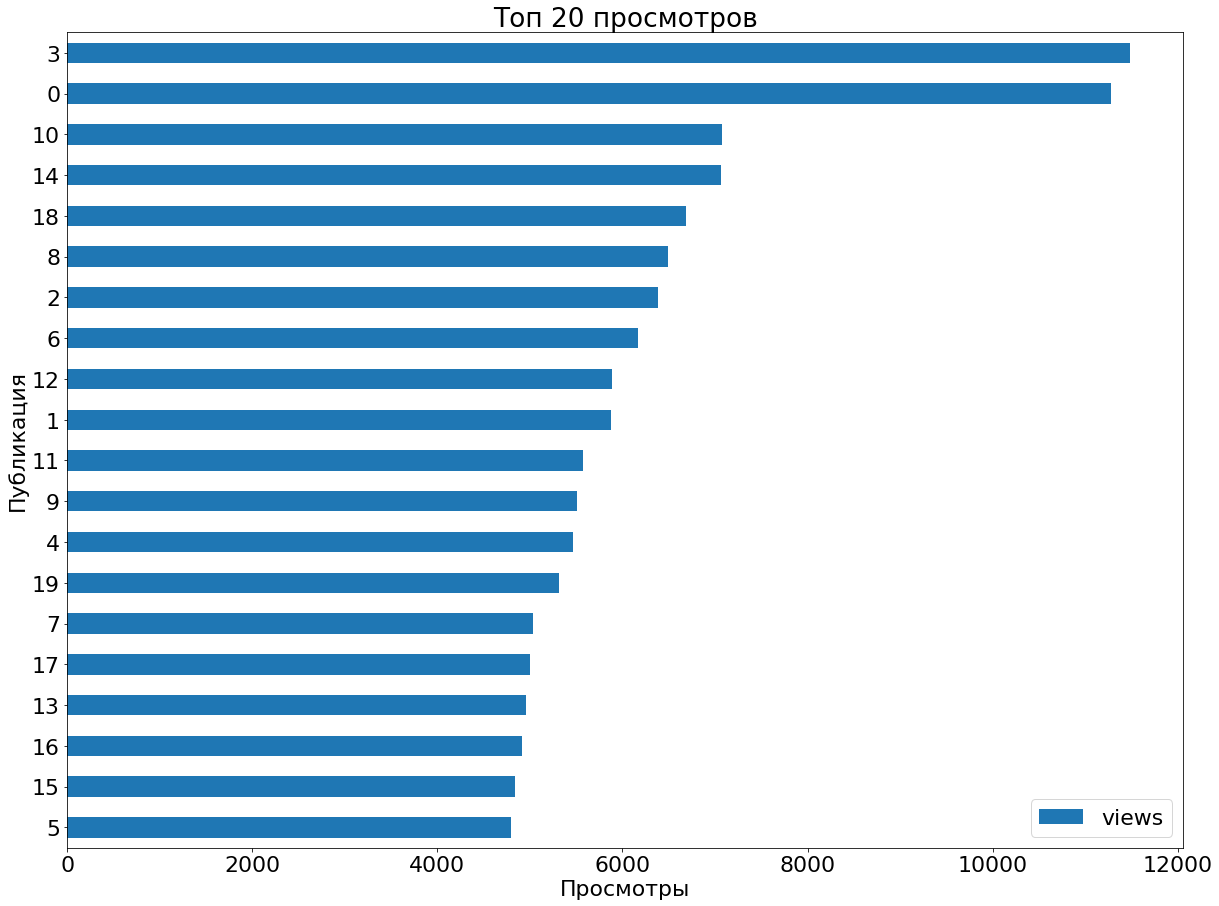

In [42]:
ax = rbk_visual.groupby('публикация')['views'].sum().reset_index().sort_values(by='views', ascending=True).plot(kind='barh',figsize=(20, 15))

ax.set_title('Топ 20 просмотров')
ax.set_xlabel('Просмотры')
ax.set_ylabel('Публикация')
#ax.set_xticks(rbk_visual.index)

In [41]:
rbk_visual

,публикация,views
94,"Глава BlaBlaCar — РБК: «Мы оказывали услуги, н...",11483
33,«Алые паруса» сворачиваются: почему владельцы ...,11282
206,Кедры решают все: как вывести косметику на аме...,7078
247,Недооцененный экспорт: что имеет смысл продава...,7067
362,Требования работодателя vs ожидания кандидатов...,6689
175,Как потребителей заставили платить больше: чет...,6492
85,Восемь способов увеличить средний чек,6386
125,Золушки молла: где маленьким сервисам найти пр...,6170
229,Менеджеры РФ получают дополнительное образован...,5888
78,"Видишь, я дарю: как заработать на необычных ко...",5877
